# 1N4148 Diode – Datasheet vs LTspice Simulation

This notebook compares key electrical parameters of the **1N4148 switching diode** using:

- Datasheet values 
- LTspice simulation
- Measured from exported waveform data

---

## Datasheet Specifications (1N4148)

| **Parameter**               | **Conditions**                  | **Max Value** | **Unit** | **Figure Ref** |
|----------------------------|----------------------------------|---------------|----------|----------------|
| Forward Voltage ($V_F$)    | $I_F = 10\,\text{mA}$          | 1.0           | V        | -              |
| Reverse Leakage ($I_R$)    | $V_R = 20\,\text{V}$ @ 25°C    | 25            | nA       | -              |
| Reverse Leakage ($I_R$)    | $V_R = 20\,\text{V}$ @ 150°C   | 50            | µA       | -              |
| Reverse Recovery ($t_{rr}$)| $I_F = 10\,\text{mA} \to I_R = 60\,\text{mA}$ | 4     | ns       |               |
| Junction Capacitance ($C_j$)| $V_R = 0$, $f = 1$ MHz           | 4 (typ.)      | pF       | -             |

In [9]:
import pandas as pd

# Load exported LTspice data
df = pd.read_csv("data/1N4148_Vf_Test.csv", sep="\t")
df.head()

,I1,V(n001)
0,0.0000,0.000000
1,0.0001,0.466283
2,0.0002,0.503399
3,0.0003,0.525173
4,0.0004,0.540956


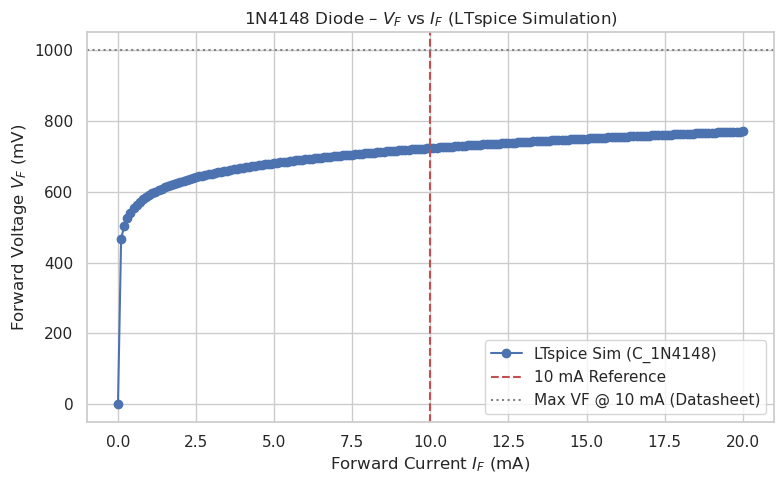

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure numeric conversion
df["I1"] = pd.to_numeric(df["I1"], errors='coerce')
df["V(n001)"] = pd.to_numeric(df["V(n001)"], errors='coerce')

# Drop any rows with NaNs (e.g., bad conversions)
df_clean = df.dropna()

# Plot
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.plot(df_clean["I1"].values * 1000, df_clean["V(n001)"].values * 1000,
         marker='o', label="LTspice Sim (C_1N4148)")
plt.axvline(10, color='r', linestyle='--', label="10 mA Reference")
plt.axhline(1000, color='gray', linestyle=':', label="Max VF @ 10 mA (Datasheet)")
plt.title("1N4148 Diode – $V_F$ vs $I_F$ (LTspice Simulation)")
plt.xlabel("Forward Current $I_F$ (mA)")
plt.ylabel("Forward Voltage $V_F$ (mV)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

## Evaluation Summary

| Parameter                   | LTspice Result | Datasheet Max | Within Spec? |
|----------------------------|----------------|----------------|--------------|
| $V_F$ @ 10 mA              | 723 mV         | 1.0 V          | ✅ Yes       |

The SPICE model closely matches **typical** behavior observed in datasheet curves, and the result is **well within** the specification limit.

---

## Supporting Files

- [1N4148_Vf_Test.csv – LTspice-exported data](https://github.com/lkshirahatti/IntegratedCircuits/blob/main/Diode/SPICE/Data/1N4148_Vf_Test.csv)
- [1N4148_Vf_Test.asc – Simulation schematic](https://github.com/lkshirahatti/IntegratedCircuits/blob/main/Diode/SPICE/Data/1N4148_Vf_Test.asc)
- [1N4148_Vf_Test.JPG – LTspice graph capture](https://github.com/lkshirahatti/IntegratedCircuits/blob/main/Diode/SPICE/Data/1N4148_Vf_Test.JPG)



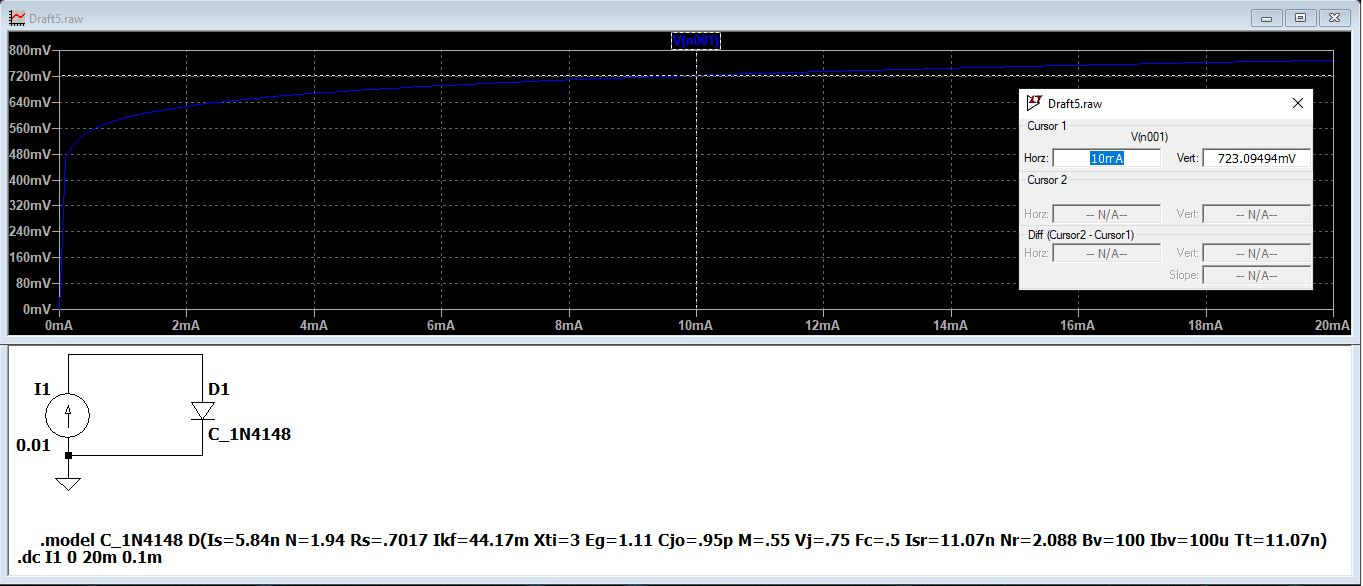

In [8]:
from IPython.display import Image
Image("data/1N4148_Vf_Test.JPG")